Information about data:

                     ->We have the amazon reviews dataset from kaggle
                     
                     ->Reviews are given for the product
                     
                     ->The features of the data were:
                     
                           Id
                           
                           ProductId- unique identifier for the product
                           
                           UserId- unqiue identifier for the user
                           
                           ProfileName
                           
                           HelpfullnessNumerator- number of users who found the review helpful
                           
                           HelpfulnessDenominator- number of users who indicated whether they 
                           found the reiew helpful or not
                           
                           Score-rating between 1 and 5
                           
                           Time-timestamp for the review
                           
                           Summary- brief summary of the review
                           
                           Text- text of the review
                       
                     -> Based on the score of the review we review we classify them into positive 
                        and negative
                     
                     Number of reviews: 568,454

                     
                    
                     
                  

Objective:
    
    -> Classification of test and train data should be based on time
    
    -> Applying NAIVE BAYES model on the amazon food review dataset
    
    -> Finding the Laplace Smoothing parameter(alpha) by performing cross validation
    
    -> Important features for the class labels in the dataset
    
    -> Performance measure using:
              
                   -> Accuracy
                
                   -> Precision 
                    
                   -> Recall
                  
                   -> F-1 Score
                
                   -> Confusion Matrix :
                            
                              -> TPR
                                
                              -> TNR
                            
                              -> FPR
                                
                              -> FNR

Importing the required libraries

In [1]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer,CountVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score

Using the sqlite3 to load data

In [2]:
con = sqlite3.connect("database.sqlite")

Filtering the reviews with positive and negative based on the score

In [3]:
 
filtereddata = pd.read_sql_query("SELECT * FROM Reviews WHERE Score !=3",con) 

Information about the data:
    
    ->The shape of data
    
    ->dimensionality of data
    
    ->Number of features
    
    ->Sample data

In [4]:

print(filtereddata.shape)
print(filtereddata.ndim)
print(filtereddata.columns)
print(filtereddata.head(5))

(525814, 10)
2
Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')
   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0

->function to classify reviews into positive and negative based on rating. 

->Here we are considering that reviews with a rating more than 3 are as positive and reviews with rating 

->less than 3 as negative. So considering 3 as the neutral rating, so neglecting the reviews which are given 

  with rating of 3

In [5]:

def classify(x):
    if x>3:
        return 'positive'
    return 'negative'

rating = filtereddata['Score']
rating = rating.map(classify)
filtereddata['Score'] = rating

In [6]:
print(filtereddata.head(5))

   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator     Score        Time  \
0                     1                       1  positive  1303862400   
1                     0                       0  negative  1346976000   
2                     1                       1  positive  1219017600   
3                     3                       3  negative  1307923200   
4                     0                       0  positive  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitalit


Exploratory data analysis

Deduplication:removing duplicates

In [7]:

dup = pd.read_sql_query("""SELECT * FROM REVIEWS WHERE Score !=3 AND UserId="AR5J8UI46CURR" ORDER BY ProductId """,con)
dup

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,78445,B000HDL1RQ,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
1,138317,B000HDOPYC,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
2,138277,B000HDOPYM,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
3,73791,B000HDOPZG,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
4,155049,B000PAQ75C,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...


  ->It shows that same user have 5 reviews at the same time which is not possible
  
  ->This is because if we review on product it is applied to different flavors in the product  

  ->In order to remove the product we have to sort them and drop the duplicates

In [8]:

sorteddata = filtereddata.sort_values("ProductId",axis=0,ascending=True,inplace=False,kind='quicksort',na_position='last')


In [9]:
finaldata = sorteddata.drop_duplicates(subset=('Time','Text','ProfileName','UserId'),keep='first',inplace=False)

In [10]:
finaldata.shape

(364173, 10)

->One more observation is that for a product the useful review(helpfullnessnumerator) is greater that the Total number of reviews on the product(helpfullnessdenominator) which is not possible

In [11]:

numden = pd.read_sql_query("""SELECT * FROM Reviews WHERE Score !=3 AND Id=44737 OR Id = 64422 ORDER BY ProductId""",con)

In [12]:
numden

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...
1,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...


In [13]:
finaldata = finaldata[finaldata.HelpfulnessNumerator<=finaldata.HelpfulnessDenominator]
finaldata

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,positive,939340800,EVERY book is educational,this witty little book makes my son laugh at l...
138688,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,positive,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc..."
138689,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,positive,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...
138690,150508,0006641040,AZGXZ2UUK6X,"Catherine Hallberg ""(Kate)""",1,1,positive,1076025600,a good swingy rhythm for reading aloud,This is a great little book to read aloud- it ...
138691,150509,0006641040,A3CMRKGE0P909G,Teresa,3,4,positive,1018396800,A great way to learn the months,This is a book of poetry about the months of t...
138693,150511,0006641040,A1C9K534BCI9GO,Laura Purdie Salas,0,0,positive,1344211200,Charming and childlike,"A charming, rhyming book that describes the ci..."
138694,150512,0006641040,A1DJXZA5V5FFVA,A. Conway,0,0,positive,1338249600,Must have.,I set aside at least an hour each day to read ...
138695,150513,0006641040,ASH0DZQQF6AIZ,tessarat,0,0,positive,1325721600,A classic,I remembered this book from my childhood and g...
138696,150514,0006641040,A2ONB6ZA292PA,Rosalind Matzner,0,0,positive,1313884800,Chicken soup with Rice,It's a great book with adorable illustrations....
138697,150515,0006641040,A2RTT81R6Y3R7X,Lindylu,0,0,positive,1303171200,One of our family's favorite books,This book is a family favorite and was read to...


In [14]:
print(finaldata.shape)
print(finaldata.head(5))

(364171, 10)
            Id   ProductId          UserId                  ProfileName  \
138706  150524  0006641040   ACITT7DI6IDDL              shari zychinski   
138688  150506  0006641040  A2IW4PEEKO2R0U                        Tracy   
138689  150507  0006641040  A1S4A3IQ2MU7V4        sally sue "sally sue"   
138690  150508  0006641040     AZGXZ2UUK6X  Catherine Hallberg "(Kate)"   
138691  150509  0006641040  A3CMRKGE0P909G                       Teresa   

        HelpfulnessNumerator  HelpfulnessDenominator     Score        Time  \
138706                     0                       0  positive   939340800   
138688                     1                       1  positive  1194739200   
138689                     1                       1  positive  1191456000   
138690                     1                       1  positive  1076025600   
138691                     3                       4  positive  1018396800   

                                           Summary  \
138706       

BAG OF WORDS:
    
    -> Applying BOW to convert the text to vectors
    
    -> Applying BERNOULI NAVIE BAYES to determine alpha value by using cross validation
    
    -> Examining the accurancy measures

TIME BASED SPLITTING

In [15]:
count_vector_data = finaldata.sort_values("Time",axis=0,ascending=True,kind='quicksort',na_position='last')

In [16]:
print(count_vector_data.shape)
print(count_vector_data.head(5))

(364171, 10)
            Id   ProductId          UserId               ProfileName  \
138706  150524  0006641040   ACITT7DI6IDDL           shari zychinski   
138683  150501  0006641040   AJ46FKXOVC7NR        Nicholas A Mesiano   
417839  451856  B00004CXX9   AIUWLEQ1ADEG5          Elizabeth Medina   
346055  374359  B00004CI84  A344SMIA5JECGM           Vincent P. Ross   
417838  451855  B00004CXX9   AJH6LUC1UT1ON  The Phantom of the Opera   

        HelpfulnessNumerator  HelpfulnessDenominator     Score       Time  \
138706                     0                       0  positive  939340800   
138683                     2                       2  positive  940809600   
417839                     0                       0  positive  944092800   
346055                     1                       2  positive  944438400   
417838                     0                       0  positive  946857600   

                                                  Summary  \
138706                        

In [17]:
count_vect = CountVectorizer()
final_count = count_vect.fit_transform(count_vector_data['Text'].values)


In [18]:
print(type(final_count))
final_count.shape

<class 'scipy.sparse.csr.csr_matrix'>


(364171, 115281)

In [19]:
a = count_vect.inverse_transform(final_count[9])
print(a)
print(final_count[9])

[array(['tks', 'tell', 'please', 'could', 'vhs', 'today', 'impossible',
       'really', 'video', 'french', 'beatlejuice', 'getting', 'looking',
       'find', 'crazy', 'version', 'not', 'film', 'for', 'something',
       'me', 'to', 'is', 'of', 'about', 'the', 'it', 'this'],
      dtype='<U124')]
  (0, 104497)	1
  (0, 102790)	1
  (0, 80806)	1
  (0, 32479)	1
  (0, 110031)	1
  (0, 104615)	1
  (0, 56957)	1
  (0, 85950)	1
  (0, 110118)	1
  (0, 47622)	2
  (0, 19534)	1
  (0, 49514)	1
  (0, 64959)	1
  (0, 45603)	1
  (0, 32984)	1
  (0, 109908)	2
  (0, 73670)	1
  (0, 45534)	1
  (0, 46897)	1
  (0, 96426)	1
  (0, 67842)	1
  (0, 104542)	1
  (0, 59142)	1
  (0, 74846)	1
  (0, 5150)	1
  (0, 103373)	1
  (0, 59284)	2
  (0, 103749)	1


In [20]:
score = count_vector_data['Score']

In [21]:
score.shape

(364171,)

-> Splitting the data, 70 percent to training and 30 percent to testing

In [22]:
x_train = final_count[0:254919]
x_test = final_count[254919:]
y_train = score[0:254919]
y_test = score[254919:]

In [23]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(254919, 115281)
(109252, 115281)
(254919,)
(109252,)


In [24]:
from sklearn.naive_bayes import BernoulliNB

In [25]:
lst  = list(np.arange(1,30,2))
print(lst)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]


In [26]:
from sklearn.cross_validation import cross_val_score

C:\Users\Anil Chowdary\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [27]:
cross_validation_score = []
for a in lst:
    clasifier = BernoulliNB(alpha=a)
    scores = cross_val_score(clasifier,x_train,y_train,cv=10,scoring='accuracy')
    cross_validation_score.append(scores.mean())

In [28]:
cross_validation_score

[0.8765921749991934,
 0.8662045645705694,
 0.8576802839678888,
 0.8532435810208916,
 0.8506702142093108,
 0.8497208946219365,
 0.8491834691159585,
 0.8492383898451885,
 0.8492423123367189,
 0.8492776156838302,
 0.8494109917836937,
 0.8496345919598985,
 0.8498032724841004,
 0.8499288022158968,
 0.8499876443594301]

In [29]:
error = [1 - x for x in cross_validation_score]
print(error)

[0.1234078250008066, 0.13379543542943062, 0.14231971603211124, 0.1467564189791084, 0.14932978579068923, 0.15027910537806355, 0.15081653088404146, 0.1507616101548115, 0.15075768766328113, 0.1507223843161698, 0.15058900821630627, 0.15036540804010146, 0.15019672751589963, 0.15007119778410316, 0.15001235564056992]


Text(0.5,1,'Alpha vs CV Score')

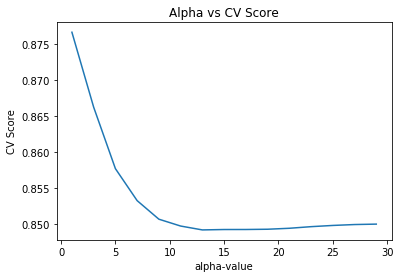

In [30]:
mp.plot(lst,cross_validation_score)
mp.xlabel('alpha-value')
mp.ylabel("CV Score")
mp.title("Alpha vs CV Score")

Text(0.5,1,'Alpha vs Error')

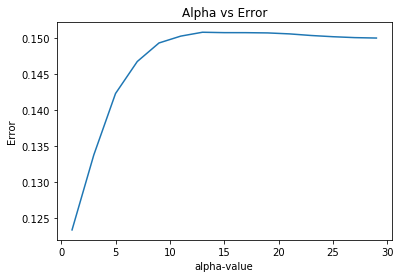

In [31]:
mp.plot(lst,error)
mp.xlabel('alpha-value')
mp.ylabel("Error")
mp.title("Alpha vs Error")

In [32]:
best_a = lst[error.index(min(error))]

In [33]:
best_a

1

Observation:
    
    -> The highest accurancy and lowest error is occured when alpha = 1
    
    -> Using alpha = 1 to design the classifier

In [34]:
bnb = BernoulliNB(alpha=1)
bnb.fit(x_train,y_train)
prdct = bnb.predict(x_test)

In [35]:
type(bnb)

sklearn.naive_bayes.BernoulliNB

Calculating Performance measure using:

               -> Accuracy

               -> Precision 

               -> Recall

               -> F-1 Score

               -> Confusion Matrix :

                          -> TPR

                          -> TNR

                          -> FPR

                          -> FNR

ACCURACY SCORE

In [37]:
acc = accuracy_score(y_test,prdct)
print(acc)

0.8615494453190788


PRECISION SCORE:

             This is the ratio of true positives to sum of true positives and false positives

In [38]:
print(prdct.shape)
print(y_test.shape)


(109252,)
(109252,)


In [39]:
prcs = precision_score(y_test,prdct, average = 'binary',pos_label='positive')

In [40]:
prcs

0.9138130686517784

RECALL SCORE:
    
    This is the ratio of true positives to the sum of true positives and flase negatives

In [41]:
rs = recall_score(y_test,prdct,average='binary',pos_label='positive')

In [42]:
rs

0.9189207173037894

F-1 SCORE:
    
    This is the weighted avergae of precision and recall scores

In [43]:
f_scr = f1_score(y_test,prdct,pos_label='positive')

In [44]:
f_scr

0.916359775720779

CONFUSION-MATRIX:
    
    This evaluates the accurancy of a classification

In [45]:
cm = confusion_matrix(y_test,prdct)
cm

array([[11266,  7815],
       [ 7311, 82860]], dtype=int64)

In [46]:
cmr  = cm.ravel()
cmr

array([11266,  7815,  7311, 82860], dtype=int64)

In [47]:
tn,fp,fn,tp = cmr

In [48]:
tn

11266

In [49]:
tp

82860

In [50]:
fp

7815

In [51]:
fn

7311

Note:
    
    -> TRUE POSITIVE RATE IS THE RATIO OF TRUE POSITIVES TO TOTAL POSITIVE 
    
    -> TRUE NEGATIVE RATE IS THE RATIO OF TRUE NEGATIVES TO TOTAL NEGATIVE
    
    -> FALSE POSITIVE RATE IS THE RATIO OF FALSE POSITIVES TO TOTAL POSITIVE
    
    -> FALSE NEGATIVE RATE IS THE RATIO OF FALSE NEGATIVES TO TOTAL NEGATIVES

In [52]:
true_positive_rate = tp/(fn+tp)
true_negative_rate = tn/(tn+fp)
false_positive_rate = fp/(fn+tp)
false_negative_rate = fn/(tn+fp)
print("true positive rate is {}".format(true_positive_rate))
print("true_negative_rate is {}".format(true_negative_rate))
print("false positive rate is {}".format(false_positive_rate))
print("false_negative_rate is {}".format(false_negative_rate))


true positive rate is 0.9189207173037894
true_negative_rate is 0.5904302709501599
false positive rate is 0.08666866287387298
false_negative_rate is 0.3831560190765683


TFIDF:
    
    -> Applying TFIDF to convert the text to vectors
    
    -> Applying BERNOULI NAVIE BAYES to determine alpha value by using cross validation
    
    -> Examining the accurancy measures

Time Based Splitting:
    
    Sorting the data based on the time

In [53]:
tfidf_data = finaldata.sort_values("Time",axis=0,ascending=True,kind='quicksort',na_position='last')

In [54]:
print(tfidf_data.shape)
print(tfidf_data.ndim)
print(tfidf_data.columns)
print(tfidf_data.head(5))

(364171, 10)
2
Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')
            Id   ProductId          UserId               ProfileName  \
138706  150524  0006641040   ACITT7DI6IDDL           shari zychinski   
138683  150501  0006641040   AJ46FKXOVC7NR        Nicholas A Mesiano   
417839  451856  B00004CXX9   AIUWLEQ1ADEG5          Elizabeth Medina   
346055  374359  B00004CI84  A344SMIA5JECGM           Vincent P. Ross   
417838  451855  B00004CXX9   AJH6LUC1UT1ON  The Phantom of the Opera   

        HelpfulnessNumerator  HelpfulnessDenominator     Score       Time  \
138706                     0                       0  positive  939340800   
138683                     2                       2  positive  940809600   
417839                     0                       0  positive  944092800   
346055                     1                       2  positive  944438400   


In [55]:
tfid = TfidfVectorizer(ngram_range=(1,2))

In [56]:
tfid_vect = tfid.fit_transform(tfidf_data['Text'].values)

In [57]:
print(tfid_vect.shape)
print(type(tfid_vect))

(364171, 2910192)
<class 'scipy.sparse.csr.csr_matrix'>


Splitting first 70 percent of data as training data and rest 30 percent data as test data set

In [58]:
x_train1 = tfid_vect[0:254919]
x_test1 = tfid_vect[254919:]
y_train1 = score[0:254919]
y_test1 = score[254919:]

In [59]:
print(x_train1.shape)
print(x_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(254919, 2910192)
(109252, 2910192)
(254919,)
(109252,)


In [60]:
from sklearn.cross_validation import cross_val_score

In [61]:
print(lst)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]


In [62]:
cross_validation_score = []
for a in lst:
    clasifier = BernoulliNB(alpha=a)
    scores = cross_val_score(clasifier,x_train1,y_train1,cv=10,scoring='accuracy')
    cross_validation_score.append(scores.mean())

In [63]:
cross_validation_score

[0.8519765096110845,
 0.8479320913656231,
 0.8495600569263413,
 0.8502347813314926,
 0.850446612955879,
 0.8505407602931985,
 0.8506898271286316,
 0.8507055180180908,
 0.8507486689643858,
 0.8507604375162041,
 0.8507761288673322,
 0.8507839744659513,
 0.8507761288673322,
 0.8507957430177695,
 0.8508035886163888]

In [64]:
error = [1 - x for x in cross_validation_score]

In [65]:
error

[0.1480234903889155,
 0.1520679086343769,
 0.1504399430736587,
 0.14976521866850745,
 0.14955338704412102,
 0.14945923970680153,
 0.14931017287136839,
 0.1492944819819092,
 0.14925133103561417,
 0.14923956248379588,
 0.14922387113266777,
 0.14921602553404867,
 0.14922387113266777,
 0.1492042569822305,
 0.14919641138361117]

Text(0.5,1,'Alpha vs CV Score')

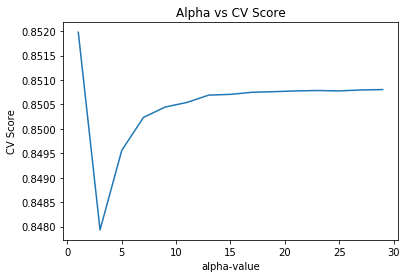

In [66]:

mp.plot(lst,cross_validation_score)
mp.xlabel('alpha-value')
mp.ylabel("CV Score")
mp.title("Alpha vs CV Score")

Text(0.5,1,'Alpha vs Error')

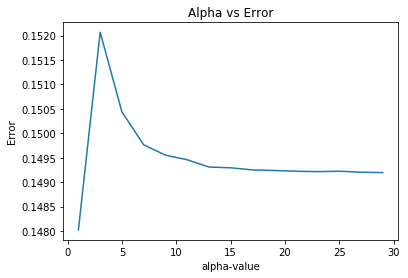

In [67]:

mp.plot(lst,error)
mp.xlabel('alpha-value')
mp.ylabel("Error")
mp.title("Alpha vs Error")

In [68]:
best_a1 = lst[error.index(min(error))]
print(best_a1)

1


Observation:
    
    -> The highest accurancy and lowest error is occured when alpha = 1
    
    -> Using alpha = 1 to design the classifier

In [69]:
bernoulinb = BernoulliNB(alpha=1)
bernoulinb.fit(x_train1,y_train1)
prdct1 = bernoulinb.predict(x_test1)



Calculating Performance measure using:

               -> Accuracy

               -> Precision 

               -> Recall

               -> F-1 Score

               -> Confusion Matrix :

                          -> TPR

                          -> TNR

                          -> FPR

                          -> FNR

ACCURACY SCORE:
    
    TELLS US HOW ACCURATE THE MODEL IS IN PREDICTING
    
    

In [70]:
acc1 = accuracy_score(y_test1,prdct1)
print(acc1)

0.8321403727162889



PRECISION SCORE:

         This is the ratio of true positives to sum of true positives and false positives

In [71]:
prcs1 = precision_score(y_test,prdct, average = 'binary',pos_label='positive')
print(prcs1)

0.9138130686517784


RECALL SCORE:
    
    This is the ratio of true positives to the sum of true positives and flase negatives

In [72]:
rs1 = recall_score(y_test1,prdct1,average='binary',pos_label='positive')
print(rs1)

0.9563163323019596


F-1 SCORE:
    
    This is the weighted avergae of precision and recall scores

In [73]:

f_scr1 = f1_score(y_test1,prdct1,pos_label='positive')

print(f_scr1)

0.90388515903838


CONFUSION-MATRIX:
    
    This evaluates the accurancy of a classification

In [74]:
cmr1 = confusion_matrix(y_test1,prdct1)
print(cmr1)

[[ 4681 14400]
 [ 3939 86232]]


In [75]:
tn1,fp1,fn1,tp1 = cmr1.ravel()

In [76]:
tp1

86232

In [77]:
tn1

4681

In [78]:
fp1

14400

In [79]:
fn1

3939

Note:

-> TRUE POSITIVE RATE IS THE RATIO OF TRUE POSITIVES TO TOTAL POSITIVE 

-> TRUE NEGATIVE RATE IS THE RATIO OF TRUE NEGATIVES TO TOTAL NEGATIVE

-> FALSE POSITIVE RATE IS THE RATIO OF FALSE POSITIVES TO TOTAL POSITIVE

-> FALSE NEGATIVE RATE IS THE RATIO OF FALSE NEGATIVES TO TOTAL NEGATIVES

In [80]:

true_positive_rate1 = tp1/(fn1+tp1)

true_negative_rate1 = tn1/(tn1+fp1)

false_positive_rate1 = fp1/(fn1+tp1)

false_negative_rate1 = fn1/(tn1+fp1)

print("true positive rate is {}".format(true_positive_rate1))

print("true_negative_rate is {}".format(true_negative_rate1))

print("false positive rate is {}".format(false_positive_rate1))

print("false_negative_rate is {}".format(false_negative_rate1))

true positive rate is 0.9563163323019596
true_negative_rate is 0.2453225721922331
false positive rate is 0.15969657650464117
false_negative_rate is 0.20643572139824956


NOTE:
    
    COMPARISON OF PERFORMANCE RESULTS OCCURED IN BOTH THE MODELS

In [81]:
d = {'Accurancy Score':[acc,acc1],'Precision Score':[prcs,prcs1],'Recall Score':[rs,rs1],'F-1 Score':[f_scr,f_scr1],'tn':[tn,tn1],'tp':[tp,tp1],
    'fp':[fp,fp1],'fn':[fn,fn1],'tnr':[true_negative_rate,true_negative_rate1],
     'tpr':[true_positive_rate,true_negative_rate1],"fpr":[false_positive_rate,false_negative_rate1],
     'fnr':[false_negative_rate,false_negative_rate1],'Technique':['BOW','TFIDF']}

In [82]:
from collections import OrderedDict

In [83]:
df = pd.DataFrame(data=d,index=['BOW','TFIDF'])
print(df)

       Accurancy Score  F-1 Score  Precision Score  Recall Score Technique  \
BOW           0.861549   0.916360         0.913813      0.918921       BOW   
TFIDF         0.832140   0.903885         0.913813      0.956316     TFIDF   

         fn       fnr     fp       fpr     tn       tnr     tp       tpr  
BOW    7311  0.383156   7815  0.086669  11266  0.590430  82860  0.918921  
TFIDF  3939  0.206436  14400  0.206436   4681  0.245323  86232  0.245323  


WORD2VEC:
    
    Constructing the word2vec model vector representation of each word in the corpus

In [84]:
import gensim

C:\Users\Anil Chowdary\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [85]:
from gensim.models import word2vec

->Removing stop words


->Stemming the words

In [86]:
import re
def cleanhtml(sentence):
    clean = re.compile("<.*?>")
    cleantext = re.sub(clean," ",sentence)
    return cleantext
def cleanpunct(sentence):
    cleaned = re.sub(r'[?|!|\|#|"]',r' ',sentence)
    cleaned = re.sub(r'[<|,|)|(|>|<]',r' ',cleaned)
    return cleaned

Sorting the data based on time to do time based analysis

In [87]:
finaldata1 = finaldata.sort_values("Time",axis=0,ascending=True,kind='quicksort',na_position='last')

In [88]:
finaldata1.shape

(364171, 10)

In [89]:
i=0
listofsent=[]
for sent in finaldata1['Text'].values:
    filtered_sentences = []
    sent = cleanhtml(sent)
    for w in sent.split():
        for cleanedwordws in cleanpunct(w).split():
            if(cleanedwordws.isalpha()):
                filtered_sentences.append(cleanedwordws.lower())
    listofsent.append(filtered_sentences)   

In [90]:
print(type(listofsent))
print(len(listofsent))
print(finaldata['Text'].values[99])
print(listofsent[99])


<class 'list'>
364171
My dog loves these treats. He's really picking with his treats so it says a lot that he loves these. I had been buying him bags of the freeze dried treats at petco, etc. and it was costing a fortune, not to mention they were smashed. These are great quality. You get tons!! in the 14 ounce bucket and my little dog is in love.
['i', 'have', 'baked', 'with', 'this', 'organic', 'vanilla', 'in', 'the', 'past', 'and', 'realized', 'that', 'it', 'is', 'not', 'a', 'vanilla', 'i', 'found', 'this', 'product', 'very', 'misleading', 'even', 'though', 'categorized', 'has', 'an', 'organic']


Constructing word2vec model with cleaned data with vector representation of each word in 100 dimensions

In [91]:
w2vmodel = gensim.models.Word2Vec(listofsent,min_count=5,size=100,workers=4)

In [92]:
w2vmodel.most_similar('good')

C:\Users\Anil Chowdary\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('great', 0.7910346984863281),
 ('decent', 0.7419871091842651),
 ('terrific', 0.6892297267913818),
 ('fantastic', 0.686516284942627),
 ('nice', 0.6577026844024658),
 ('bad', 0.6547868251800537),
 ('fine', 0.6223894953727722),
 ('tasty', 0.6080605983734131),
 ('awesome', 0.6049265265464783),
 ('yummy', 0.6035927534103394)]

In [93]:
w2vmodel.similarity('tasty','bad')

C:\Users\Anil Chowdary\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.1585759640761753

In [94]:
w2vmodel.similarity('good','bad')

C:\Users\Anil Chowdary\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.6547867707189339

In [95]:
w2vmodel.vector_size

100

AVERAGE WORD2VEC:
    
    By using the vector representation of each word trained by the word2vec and using them to 
    
    construct vector representation of each sentence

In [96]:
cnt=0
sent_vectors = []
for sent in listofsent: 
    sent_vec = np.zeros(100) 
    cnt_words =0; 
    for word in sent:
        try:
            vec = w2vmodel.wv[word]
            sent_vec += vec
            cnt += 1
        except:
            pass
    sent_vec /= cnt
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[99999]))

364171
100


In [97]:
print(len(sent_vectors))
print(sent_vectors[2])

364171
[ 0.11377362 -0.12137225  0.04100957  0.11239191 -0.00531377  0.04085946
  0.0476009  -0.09648934 -0.0010986  -0.08091155 -0.06770232 -0.01261855
  0.01557359 -0.0201358  -0.00406908 -0.00294631 -0.06391854 -0.05851824
  0.07370616 -0.10075934  0.01020004  0.17083765  0.09960079 -0.06806491
 -0.07289264  0.0326768   0.03578665  0.03273706  0.04975915  0.12016261
  0.13349243  0.03924221  0.00150166  0.04242722 -0.03049197  0.04398392
 -0.09251195 -0.10949207 -0.10690167 -0.07376308 -0.15553156 -0.09606712
 -0.01030108 -0.10004253 -0.09286605 -0.03293687  0.09037566  0.0018135
 -0.0549786  -0.04505215  0.01651171 -0.08129116  0.11047236 -0.01776721
 -0.00912226  0.06250814  0.00375688 -0.05799512 -0.03087119  0.08339526
 -0.00542605  0.01242891  0.08467643 -0.0678173  -0.10334902  0.12021792
 -0.04506014  0.01100322  0.0178055   0.0526397   0.10796456  0.10078472
 -0.07161491 -0.06737346 -0.04179112 -0.00507344  0.03336954 -0.07394222
 -0.02807944 -0.02381356  0.05421009 -0.06156

In [98]:
print(type(sent_vectors))

<class 'list'>


In [99]:
np.isnan(sent_vectors).any()

False

In [100]:
sent_vectors = np.nan_to_num(sent_vectors)

In [101]:
sent_vectors.shape

(364171, 100)

In [102]:
xtrain2 = sent_vectors[0:250000]
xtest2 = sent_vectors[250001:]
ytrain2 = finaldata1['Score'][0:250000]
ytest2 = finaldata1['Score'][250001:]

In [103]:
print(xtrain2.shape)
print(ytrain2.shape)
print(xtest2.shape)
print(ytest2.shape)

(250000, 100)
(250000,)
(114170, 100)
(114170,)


In [104]:
from sklearn.cross_validation import cross_val_score

In [105]:
print(lst)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]


In [106]:
cross_validation_score = []
for a in lst:
    clasifier = BernoulliNB(alpha=a)
    scores = cross_val_score(clasifier,xtrain2,ytrain2,cv=10,scoring='accuracy')
    cross_validation_score.append(scores.mean())

In [107]:
error  = [1 - x for x in cross_validation_score]
print(cross_validation_score)
print(error)

[0.825979747778822, 0.826031747298854, 0.8260757477788989, 0.8261197474589501, 0.8261037469789052, 0.8261637471389628, 0.8261597482589564, 0.8261877484190012, 0.8262357495390715, 0.826255750019078, 0.8263357498591868, 0.8263357496991676, 0.8263597496991931, 0.8264197506592955, 0.826459751299334]
[0.174020252221178, 0.17396825270114602, 0.17392425222110108, 0.17388025254104988, 0.1738962530210948, 0.1738362528610372, 0.17384025174104356, 0.17381225158099878, 0.17376425046092847, 0.17374424998092197, 0.17366425014081321, 0.17366425030083243, 0.17364025030080688, 0.17358024934070448, 0.17354024870066598]


Text(0.5,1,'Alpha vs CV Score')

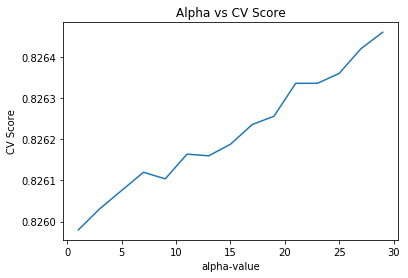

In [108]:
mp.plot(lst,cross_validation_score)
mp.xlabel('alpha-value')
mp.ylabel("CV Score")
mp.title("Alpha vs CV Score")

Text(0.5,1,'Alpha vs Error')

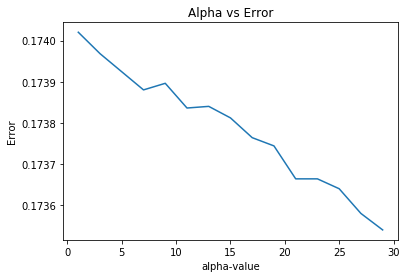

In [109]:
mp.plot(lst,error)
mp.xlabel('alpha-value')
mp.ylabel("Error")
mp.title("Alpha vs Error")

In [110]:
best_a2 = lst[error.index(min(error))]
print(best_a2)

29


Observation:
    
    -> The highest accurancy and lowest error is occured when alpha = 29
    
    -> Using alpha = 1 to design the classifier

In [111]:
bernoulinb = BernoulliNB(alpha=29)
bernoulinb.fit(xtrain2,ytrain2)
prdct2 = bernoulinb.predict(xtest2)

In [112]:
prdct2.shape

(114170,)

Calculating Performance measure using:

               -> Accuracy

               -> Precision 

               -> Recall

               -> F-1 Score

               -> Confusion Matrix :

                          -> TPR

                          -> TNR

                          -> FPR

                          -> FNR

ACCURACY SCORE:
    
    TELLS US HOW ACCURATE THE MODEL IS IN PREDICTING
    
    

In [113]:
acc2 = accuracy_score(ytest2,prdct2)
print(acc2)

0.8111938337566786


PRECISION SCORE:

         This is the ratio of true positives to sum of true positives and false positives

In [114]:
prcs2 = precision_score(ytest2,prdct2, average = 'binary',pos_label='positive')
print(prcs2)

0.90257540192214


RECALL SCORE:
    
    This is the ratio of true positives to the sum of true positives and flase negatives

In [115]:
rs2 = recall_score(ytest2,prdct2,average='binary',pos_label='positive')
print(rs2)

0.8646816725714407


F-1 SCORE:
    
    This is the weighted avergae of precision and recall scores

In [116]:

f_scr2 = f1_score(ytest2,prdct2,pos_label='positive')

print(f_scr2)

0.8832222763963378


CONFUSION-MATRIX:
    
    This evaluates the accurancy of a classification

In [117]:
cmr2 = confusion_matrix(ytest2,prdct2)
print(cmr2)

[[11097  8799]
 [12757 81517]]


In [118]:
tn2,fp2,fn2,tp2 = cmr2.ravel()

In [119]:
tn2

11097

In [120]:
fp2

8799

In [121]:
fn2

12757

In [122]:
tp2

81517

Note:

-> TRUE POSITIVE RATE IS THE RATIO OF TRUE POSITIVES TO TOTAL POSITIVE 

-> TRUE NEGATIVE RATE IS THE RATIO OF TRUE NEGATIVES TO TOTAL NEGATIVE

-> FALSE POSITIVE RATE IS THE RATIO OF FALSE POSITIVES TO TOTAL POSITIVE

-> FALSE NEGATIVE RATE IS THE RATIO OF FALSE NEGATIVES TO TOTAL NEGATIVES

In [123]:

true_positive_rate2 = tp2/(fn2+tp2)

true_negative_rate2 = tn2/(tn2+fp2)

false_positive_rate2 = fp2/(fn2+tp2)

false_negative_rate2 = fn2/(tn2+fp2)

print("true positive rate is {}".format(true_positive_rate2))

print("true_negative_rate is {}".format(true_negative_rate2))

print("false positive rate is {}".format(false_positive_rate2))

print("false_negative_rate is {}".format(false_negative_rate2))

true positive rate is 0.8646816725714407
true_negative_rate is 0.5577503015681544
false positive rate is 0.09333432335532596
false_negative_rate is 0.641184157619622


TFIDF-WORD2VEC

In [125]:
tfid_feat = tfid.get_feature_names()

In [126]:
len(tfid_feat)

2910192

In [128]:

print(tfid_vect[0,tfid_feat.index('the')])
print(w2vmodel.wv['the'])
a = tfid_vect[0,tfid_feat.index('the')]
b = w2vmodel.wv['the']
c = a*b
print(c)

0.04695597502995314
[-0.38087898 -2.564279    0.13754313  1.1316134   0.2925029  -1.3993564
 -2.0217445  -1.2632195  -0.62616086 -1.6356932  -1.3170269   0.7359891
  0.9645069  -0.6551743  -0.6494612  -0.3786263  -0.11755598 -0.14274636
  0.08644295 -0.06626914 -1.7037593   0.52516824 -0.17293733  0.96153486
 -0.32190636  0.7483486   0.48500887 -0.05756575 -1.36634    -0.03375257
  2.14156     0.66630673  0.0186592   0.72309476 -0.993174   -0.87290084
  1.7744738   0.53748536 -1.5149844   0.23560542 -1.4937731  -1.5358757
 -0.6739717  -1.7489989  -0.461739   -0.22216024  0.98151046 -0.47540733
  0.04611142 -0.38541836  2.8489265  -0.3393505   0.6562042   1.1125615
  0.7095221   1.9302902  -0.03608303 -1.567516   -1.91152     1.8805034
  0.34371632 -1.0052359   3.5201755  -2.0378213  -1.0841085   0.3771327
  0.6397638   0.40897596 -0.1265416  -0.4769168   1.3705907  -0.33438414
 -2.2358694  -1.1718905  -0.25857767  1.0542301   0.07859272  1.8086038
 -0.01172563 -0.5436469   0.11463425 -

Observation:
    
    -> In tfidf-word2vec it calculates the word2vec representation of each word by using the     
         word2vec model
    
    -> It will get the tfidf value of the word from tfidf vectorizer
    
    -> It will product the words with tfidf and words with word2vec in a sentence and divides 
       with total tfidf value of the sentence

In [129]:
tfid_feat = ttfidf.get_feature_names() 
tfidf_sent_vectors = []; 
row=0;
for sent in listofsent1: 
    sent_vec = np.zeros(100) 
    weight_sum =0; 
    for word in sent: 
        try:
            vec = w2vmodel1.wv[word]
            
            tfidf = tfid_data[row, tfid_feat.index(word)]
            sent_vec += (vec * tfidf)
            weight_sum += tfidf
        except:
            pass
    sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1
    print(len(tfidf_sent))

    

364171

In [132]:

print(tfid_vect[0,tfid_feat.index('in')])
print(w2vmodel.wv['in'])
a = tfid_vect[0,tfid_feat.index('in')]
b = w2vmodel.wv['in']
c = a*b
print(c)

0.03277183177760655
[ 0.24630567  0.10614999 -0.91066444  1.2145983  -1.3224634  -0.8773522
  0.05536528  0.6256457  -0.90123504  0.35664916  1.3785762   0.12856239
 -0.45661962  0.24288727 -0.8409622   0.5991392  -1.3775203  -1.9029506
 -2.4726315  -0.19539623 -2.1715653   0.7816189  -2.3939776  -0.8510448
 -0.28530917 -0.9710841  -1.8238499  -1.3172127  -0.5602136   1.1191514
  1.9451154  -0.1035039  -0.79132956 -0.45516166  0.02743903 -1.8780525
  1.4846488   0.8606082   2.7319293   2.8509173   0.29704288 -1.5353148
 -1.470713   -0.8125868   0.23036313 -0.5552995  -0.66175985  0.57335806
 -0.2581336  -0.26689422  1.3680589  -0.60551685  0.76724     1.6149808
 -1.8948125  -0.13565017 -1.9780403  -2.407124   -0.9476449   1.509016
  1.628181    0.03786704  1.1902485  -0.1954579  -1.4768878  -0.7792222
  0.78329873  0.45370498 -1.147596    0.60345346 -0.4214382  -0.8726381
 -0.54492754  3.0747972  -1.501521   -2.873879   -2.6592264   1.0230767
  2.6888936   2.9574816   1.4790492   1.750

In [ ]:
Note:
    
    -> It works in such a way that it constructs word2vec for each word in a sentence and will get the tf-idf value
       of the same word from tf-idf vectorizer
        
    -> It will do the product of both the values and to that value it will do average with total tf-idf values of that sentence
    

In [134]:
xtrain3 = tfidf_sent[0:250000]
xtest3 = tfidf_sent[250001:]
ytrain3 = finaldata1['Score'][0:250000]
ytest3 = finaldata1['Score'][250001:]

In [135]:
print(xtrain3.shape)
print(ytrain3.shape)
print(xtest3.shape)
print(ytest3.shape)

(250000, 100)
(250000,)
(114170, 100)
(114170,)


In [137]:

from sklearn.cross_validation import cross_val_score

In [139]:
llst = np.arange(1,50,2)
print(llst)

[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47
 49]


In [141]:
from sklearn.naive_bayes import BernoulliNB

In [149]:
cross_validation_score = []
for a in llst:
    classifier = BernoulliNB(alpha=a)
    scores = cross_val_score(classifier,xtrain3,ytrain3,cv=10,scoring='accuracy')
    cross_validation_score.append(scores.mean())
    

In [150]:
error = [1 - x for x in cross_validation_score]
print(cross_validation_score)
print(error)

[0.825979747778822, 0.826031747298854, 0.8260757477788989, 0.8261197474589501, 0.8261037469789052, 0.8261637471389628, 0.8261597482589564, 0.8261877484190012, 0.8262357495390715, 0.826255750019078, 0.8263357498591868, 0.8263357496991676, 0.8263597496991931, 0.8264197506592955, 0.826459751299334, 0.8265117503394237, 0.8265557493794748, 0.8265637493794749, 0.8265677504994813, 0.8265717495394812, 0.8265717506595003, 0.8266037503395258, 0.8266237504995579, 0.8266517511395837, 0.8267157500196539]
[0.174020252221178, 0.17396825270114602, 0.17392425222110108, 0.17388025254104988, 0.1738962530210948, 0.1738362528610372, 0.17384025174104356, 0.17381225158099878, 0.17376425046092847, 0.17374424998092197, 0.17366425014081321, 0.17366425030083243, 0.17364025030080688, 0.17358024934070448, 0.17354024870066598, 0.1734882496605763, 0.17344425062052515, 0.17343625062052515, 0.17343224950051872, 0.1734282504605188, 0.17342824934049972, 0.17339624966047418, 0.17337624950044206, 0.17334824886041633, 0.17

In [151]:
print(len(cross_validation_score))
print(len(error))

25
25


Text(0.5,1,'Alpha vs CV Score')

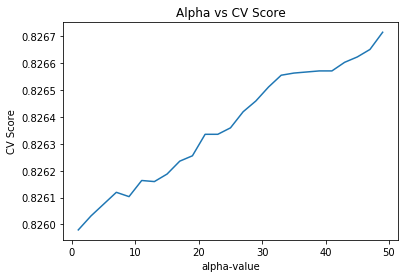

In [152]:

mp.plot(llst,cross_validation_score)
mp.xlabel('alpha-value')
mp.ylabel("CV Score")
mp.title("Alpha vs CV Score")

Text(0.5,1,'Alpha vs Error')

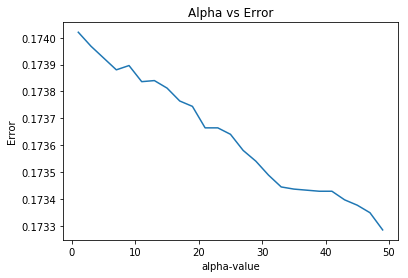

In [153]:

mp.plot(llst,error)
mp.xlabel('alpha-value')
mp.ylabel("Error")
mp.title("Alpha vs Error")

In [155]:
best_a3 = llst[error.index(min(error))]
print(best_a3)

49


Observation:
    
    -> The highest accurancy and lowest error is occured when alpha = 49
    
    -> Using alpha = 1 to design the classifier

In [157]:
bernoulinb = BernoulliNB(alpha=49)
bernoulinb.fit(xtrain3,ytrain3)
prdct3 = bernoulinb.predict(xtest3)

In [158]:
prdct3.shape

(114170,)

Calculating Performance measure using:

               -> Accuracy

               -> Precision 

               -> Recall

               -> F-1 Score

               -> Confusion Matrix :

                          -> TPR

                          -> TNR

                          -> FPR

                          -> FNR

ACCURACY SCORE:
    
    TELLS US HOW ACCURATE THE MODEL IS IN PREDICTING
    
    

In [160]:
acc3 = accuracy_score(ytest3,prdct3)
print(acc3)

0.8116142594376806


PRECISION SCORE:

         This is the ratio of true positives to sum of true positives and false positives

In [161]:
prcs3 = precision_score(ytest3,prdct3, average = 'binary',pos_label='positive')
print(prcs3)

0.9025113397499723


RECALL SCORE:
    
    This is the ratio of true positives to the sum of true positives and flase negatives

In [162]:
rs3 = recall_score(ytest3,prdct3,average='binary',pos_label='positive')
print(rs3)

0.8653287226594819


F-1 SCORE:
    
    This is the weighted avergae of precision and recall scores

In [163]:

f_scr3 = f1_score(ytest3,prdct3,pos_label='positive')

print(f_scr3)

0.8835290040289392


CONFUSION-MATRIX:
    
    This evaluates the accurancy of a classification

In [164]:
cmr3 = confusion_matrix(ytest3,prdct3)
print(cmr3)

[[11084  8812]
 [12696 81578]]


In [165]:
tn3,fp3,fn3,tp3 = cmr3.ravel()

In [166]:
tn3

11084

In [167]:
fp3

8812

In [168]:
fn3

12696

In [169]:
tp3

81578

Note:

-> TRUE POSITIVE RATE IS THE RATIO OF TRUE POSITIVES TO TOTAL POSITIVE 

-> TRUE NEGATIVE RATE IS THE RATIO OF TRUE NEGATIVES TO TOTAL NEGATIVE

-> FALSE POSITIVE RATE IS THE RATIO OF FALSE POSITIVES TO TOTAL POSITIVE

-> FALSE NEGATIVE RATE IS THE RATIO OF FALSE NEGATIVES TO TOTAL NEGATIVES

In [170]:

true_positive_rate3 = tp3/(fn3+tp3)

true_negative_rate3 = tn3/(tn3+fp3)

false_positive_rate3 = fp3/(fn3+tp)

false_negative_rate3 = fn3/(tn3+fp3)

print("true positive rate is {}".format(true_positive_rate3))

print("true_negative_rate is {}".format(true_negative_rate3))

print("false positive rate is {}".format(false_positive_rate3))

print("false_negative_rate is {}".format(false_negative_rate3))

true positive rate is 0.8653287226594819
true_negative_rate is 0.5570969039002814
false positive rate is 0.09221817572941521
false_negative_rate is 0.638118214716526


In [171]:
d = {'Accurancy Score':[acc,acc1,acc2,acc3],'Precision Score':[prcs,prcs1,prcs2,prcs3],'Recall Score':[rs,rs1,rs2,rs3],
     'F-1 Score':[f_scr,f_scr1,f_scr2,f_scr3],'tn':[tn,tn1,tn2,tn3],'tp':[tp,tp1,tp2,tp3],
    'fp':[fp,fp1,fp2,fp3],'fn':[fn,fn1,fn2,fn3],'tnr':[true_negative_rate,true_negative_rate1,true_negative_rate2,true_negative_rate3],
     'tpr':[true_positive_rate,true_positive_rate1,true_positive_rate2,true_positive_rate3],
     "fpr":[false_positive_rate,false_positive_rate1,false_positive_rate2,false_positive_rate3],
     'fnr':[false_negative_rate,false_negative_rate1,false_negative_rate2,false_positive_rate3],
     'Technique':['BOW','TFIDF','Average-word2vec','TFIDF-WORD2VEC']}

In [173]:
df = pd.DataFrame(data =d,index=["BOW",'TFIDF','AVERAGE WORD2VEC','TFIDF_WORD2VEC'])
print(df)

                  Accurancy Score  F-1 Score  Precision Score  Recall Score  \
BOW                      0.861549   0.916360         0.913813      0.918921   
TFIDF                    0.832140   0.903885         0.913813      0.956316   
AVERAGE WORD2VEC         0.811194   0.883222         0.902575      0.864682   
TFIDF_WORD2VEC           0.811614   0.883529         0.902511      0.865329   

                         Technique     fn       fnr     fp       fpr     tn  \
BOW                            BOW   7311  0.383156   7815  0.086669  11266   
TFIDF                        TFIDF   3939  0.206436  14400  0.159697   4681   
AVERAGE WORD2VEC  Average-word2vec  12757  0.641184   8799  0.093334  11097   
TFIDF_WORD2VEC      TFIDF-WORD2VEC  12696  0.092218   8812  0.092218  11084   

                       tnr     tp       tpr  
BOW               0.590430  82860  0.918921  
TFIDF             0.245323  86232  0.956316  
AVERAGE WORD2VEC  0.557750  81517  0.864682  
TFIDF_WORD2VEC    0.5570

CONCLUSION:
    
    -> Bow, Tfidf, Average word2vec, Tfidf Word2vec are used to convert the text to vectors
    
    -> Since it is a two class classification of positive and negative Bernouli Navie Bayes 
       is applied
    
    -> For each technique all the measurements like Accuracy, Precision, Recall, 
        F-1 Score, Confusion Matrix were calculated
    
    -> From confusion matrix,  true negatives, true positives, false negatives, false positives,   
        true negative rate,true positive rate, false negative rate, false positive rate         
        were calculated